In [1]:
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
df = pd.read_csv('dataset/nyc-rolling-sales.csv')
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

**Pre-processing**

In [4]:
# Data Cleaning
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'])
df = df.sort_values('SALE DATE')

df['LAND SQUARE FEET'] = pd.to_numeric(df['LAND SQUARE FEET'], errors='coerce', downcast='integer')
df['GROSS SQUARE FEET'] = pd.to_numeric(df['GROSS SQUARE FEET'], errors='coerce', downcast='integer')
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'], errors='coerce', downcast='integer')
df = df.dropna(subset=['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE'], inplace=False)

# Filter Dataframe
df = df[(df['COMMERCIAL UNITS'] > 0) & (df['SALE PRICE'] > 0)]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2784 entries, 24446 to 1791
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Unnamed: 0                      2784 non-null   int64         
 1   BOROUGH                         2784 non-null   int64         
 2   NEIGHBORHOOD                    2784 non-null   object        
 3   BUILDING CLASS CATEGORY         2784 non-null   object        
 4   TAX CLASS AT PRESENT            2784 non-null   object        
 5   BLOCK                           2784 non-null   int64         
 6   LOT                             2784 non-null   int64         
 7   EASE-MENT                       2784 non-null   object        
 8   BUILDING CLASS AT PRESENT       2784 non-null   object        
 9   ADDRESS                         2784 non-null   object        
 10  APARTMENT NUMBER                2784 non-null   object        
 11  

---
## A. Measure of Central Tendency : Mean

**Question**

Perbedaan Mean kolom 'COMMERCIAL UNITS' dari borough 1 dengan 2?

**Pre-processing**

In [6]:
b1 = df[df['BOROUGH'] == 1]
b2 = df[df['BOROUGH'] == 2]

**Implement statistical method**

In [7]:
# Menggunakan library NumPy
np.mean(b1['COMMERCIAL UNITS'])

4.622950819672131

In [8]:
# Menggunakan library NumPy
np.mean(b2['COMMERCIAL UNITS'])

2.005813953488372

---
## B. Measure of Central Tendency : Median

**Question**

Perbedaan Median kolom 'COMMERCIAL UNITS' dari borough 1 dengan 2?

**Pre-processing**

In [9]:
b1 = df[df['BOROUGH'] == 1]
b2 = df[df['BOROUGH'] == 2]

**Implement statistical method**

In [10]:
# Menggunakan library NumPy
np.median(b1['COMMERCIAL UNITS'])

2.0

In [11]:
# Menggunakan library NumPy
np.median(b2['COMMERCIAL UNITS'])

1.0

---
## C. Measure of Central Tendency : Modus

**Question**

Perbedaan Modus kolom 'COMMERCIAL UNITS' dari borough 1 dengan 2?

**Pre-processing**

In [12]:
b1 = df[df['BOROUGH'] == 1]
b2 = df[df['BOROUGH'] == 2]

**Implement statistical method**

In [13]:
# Menggunakan library SciPy
stats.mode(b1['COMMERCIAL UNITS'])

ModeResult(mode=array([2], dtype=int64), count=array([190]))

In [14]:
# Menggunakan library SciPy
stats.mode(b2['COMMERCIAL UNITS'])

ModeResult(mode=array([1], dtype=int64), count=array([232]))

---
## D. Measure of Spread: Range

**Question**

Perbedaan Range kolom 'COMMERCIAL UNITS' dari borough 1 dengan 2?

**Pre-processing**

In [15]:
b1 = df[df['BOROUGH'] == 1]
b2 = df[df['BOROUGH'] == 2]

**Implement statistical method**

In [16]:
# Menggunakan library NumPy
np.ptp(b1['COMMERCIAL UNITS'])

317

In [17]:
# Menggunakan library NumPy
np.ptp(b2['COMMERCIAL UNITS'])

21

---
## E. Measure of Spread: Variance

**Question**

Perbedaan Variance kolom 'COMMERCIAL UNITS' dari borough 1 dengan 2?

**Pre-processing**

In [18]:
b1 = df[df['BOROUGH'] == 1]
b2 = df[df['BOROUGH'] == 2]

**Implement statistical method**

In [19]:
# Menggunakan library NumPy
np.var(b1['COMMERCIAL UNITS'])

375.09553883364924

In [20]:
# Menggunakan library NumPy
np.var(b2['COMMERCIAL UNITS'])

5.837175500270406

---
## F. Measure of Spread: Standard Deviation

**Question**

Perbedaan Standard Deviation kolom 'COMMERCIAL UNITS' dari borough 1 dengan 2?

**Pre-processing**

In [21]:
b1 = df[df['BOROUGH'] == 1]
b2 = df[df['BOROUGH'] == 2]

**Implement statistical method**

In [22]:
# Menggunakan library NumPy
np.std(b1['COMMERCIAL UNITS'])

19.367383376017763

In [23]:
# Menggunakan library NumPy
np.std(b2['COMMERCIAL UNITS'])

2.41602473088965

---
## G. Probability Distribution

In [24]:
import seaborn as sns
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(5,5)})

**Question**

Distribution dari kolom 'BLOCK'?

**Implement statistical method**

C:\Users\death\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Distribution'), Text(0, 0.5, 'Frequency')]

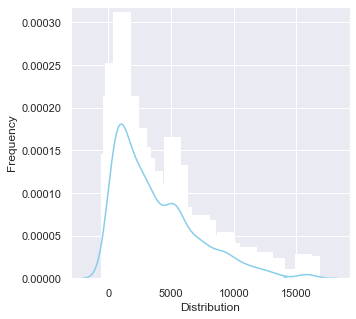

In [25]:
ax = sns.distplot(df['BLOCK'],
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15, 'alpha':1})
ax.set(xlabel='Distribution', ylabel='Frequency')

**Conclusion**

Kurva diatas memiliki bentuk positive skewness yang artinya distribusi tersebut memiliki nilai mean lebih besar daripada mode. 

---
## H. Confidence Intervals

**Question**

Berapa Confidence Intervals 'COMMERCIAL UNITS' yang bernilai 1 pada setiap borough?

In [26]:
pd.crosstab(df['BOROUGH'], df['COMMERCIAL UNITS'])

COMMERCIAL UNITS,1,2,3,4,5,6,7,8,9,10,...,52,55,59,62,126,172,254,318,436,2261
BOROUGH,,,,,,,,,,,,,,,,,,,,,
1,185,190,22,17,16,13,1,8,4,3,...,1,1,1,1,0,0,1,1,0,0
2,232,46,18,21,4,9,3,4,2,1,...,0,0,0,0,0,0,0,0,0,0
3,849,131,56,25,13,7,3,6,2,1,...,0,0,0,0,0,0,0,0,0,0
4,500,87,26,15,13,11,4,2,3,2,...,0,0,0,0,0,1,0,0,2,1
5,138,20,8,3,1,0,1,1,0,0,...,0,0,0,0,2,0,0,0,0,0


**CI (Population Proportion)**

In [27]:
cu3 = 849
# n = df3['COMMERCIAL UNITS'].value_counts().sum()
n = pd.crosstab(df['BOROUGH'], df['COMMERCIAL UNITS'])[1].sum()
cu3, n

(849, 1904)

In [28]:
p_cu3 = cu3 / n
p_cu3

0.44590336134453784

In [29]:
se_cu3 = np.sqrt(p_cu3 * (1 - p_cu3) / n)
se_cu3

0.011391467065044883

In [30]:
z_score = 1.96
lcb = p_cu3 - z_score * se_cu3 # lower limit of the CI
ucb = p_cu3 + z_score * se_cu3 # Upper limit of the CI
lcb, ucb

(0.42357608589704987, 0.4682306367920258)

**CI (Mean)**

In [31]:
mean_cu3 = np.mean(pd.crosstab(df['BOROUGH'], df['COMMERCIAL UNITS'])[1])
sd = np.std(pd.crosstab(df['BOROUGH'], df['COMMERCIAL UNITS'])[1])
n = np.size(pd.crosstab(df['BOROUGH'], df['COMMERCIAL UNITS'])[1])

mean_cu3, sd, n

(380.8, 265.65044701637527, 5)

In [32]:
se = sd / np.sqrt(n)
se

118.80249155636425

In [33]:
z_score = 1.96
lcb = mean_cu3 - z_score * se # lower limit of the CI
ucb = mean_cu3 + z_score * se # Upper limit of the CI
lcb, ucb

(147.9471165495261, 613.652883450474)

---
## I. Hypothesis Testing

In [34]:
import scipy.stats.distributions as dist

**Question**

Apakah jumlah nilai 'LAND SQUARE FEET' > 'GROSS SQUARE FEET' selalu lebih sedikit dibandingkan kebalikannya di setiap 'BOROUGH'?

In [35]:
df_ht = df[df['LAND SQUARE FEET'] > df['GROSS SQUARE FEET']]
df_ht

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
24446,6144,2,THROGS NECK,22 STORE BUILDINGS,4,5576,28,,K1,3930 EAST TREMONT AVENUE,...,0,1,1,5000.0,1911.0,1934,4,K1,1250000.0,2016-09-01
74537,25139,4,ST. ALBANS,30 WAREHOUSES,4,12452,53,,E1,118-30 MONTAUK STREET,...,0,1,1,7753.0,6170.0,1960,4,E1,1625000.0,2016-09-01
59982,10584,4,FLUSHING-SOUTH,14 RENTALS - 4-10 UNIT,2A,6905,37,,S3,164-10 65 AVE,...,3,1,4,3000.0,2228.0,1931,2,S3,750000.0,2016-09-01
40563,15212,3,GRAVESEND,22 STORE BUILDINGS,4,6491,11,,K6,1608 SHORE PARKWAY,...,0,8,8,970000.0,285471.0,1957,4,K6,224020.0,2016-09-01
40562,15211,3,GRAVESEND,22 STORE BUILDINGS,4,6491,11,,K6,1608 SHORE PARKWAY,...,0,8,8,970000.0,285471.0,1957,4,K6,224020.0,2016-09-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31273,5922,3,BROWNSVILLE,22 STORE BUILDINGS,4,3514,40,,K1,1522 PITKIN AVENUE,...,0,2,2,2323.0,2300.0,1930,4,K1,925000.0,2017-08-29
73584,24186,4,SPRINGFIELD GARDENS,01 ONE FAMILY DWELLINGS,1,13022,65,,S1,136-09 FARMERS BOULEVARD,...,1,1,2,2814.0,2600.0,1931,1,S1,450000.0,2017-08-29
21595,3293,2,MORRISANIA/LONGWOOD,22 STORE BUILDINGS,4,2979,4,,K1,1212 SOUTHERN BOULEVARD,...,0,1,1,5257.0,3500.0,1925,4,K1,1030000.0,2017-08-30
54006,4608,4,CORONA,14 RENTALS - 4-10 UNIT,2A,1743,32,,S9,102-09 37TH AVENUE,...,2,2,4,2500.0,2100.0,1930,2,S9,950000.0,2017-08-30


In [36]:
p0 = len(df_ht[df_ht['BOROUGH'] == 4]) / len(df_ht)
p0
# p > p0

0.34572490706319703

In [37]:
p_us = len(df_ht) / len(df)
p_us

0.28987068965517243

In [38]:
se = np.sqrt(p0 * (1 - p0) / len(df))
se

0.009013862163296105

In [39]:
be = p_us
he = p0
test_stat = (be - he) / se
test_stat

-6.196480087687557

In [40]:
pvalue = 2*dist.norm.cdf(-np.abs(test_stat))
pvalue

5.773983053664681e-10

**Conclusion**

p-value > alpha maka fail to reject the null hypothesis.